In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


Import data

In [106]:
df = pd.read_csv('C:/Users/chubb/Downloads/coursework_other.csv', encoding= 'unicode_escape')

# data frame example
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [107]:
le = LabelEncoder()
df['Date'] = le.fit_transform(df['Date'])
df['Seasons'] = le.fit_transform(df['Seasons'])
df['Holiday'] = le.fit_transform(df['Holiday'])
df['Functioning Day'] = le.fit_transform(df['Functioning Day'])

# data frame example
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,11,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,11,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,11,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,11,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,11,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [108]:
# extract features and label
Y = np.array(df['Rented Bike Count']) # label
raw_X = df.loc[:, df.columns != 'Rented Bike Count']
features = raw_X.columns.values
X = np.array(raw_X) # features

# split train test dataset
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=10)

Dummy Regressor

In [122]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(Xtr,Ytr)
Ypred = dummy_regr.predict(Xte)
dummy_mse = mean_squared_error(Yte, Ypred)
dummy_r2 = r2_score(Yte, Ypred)
print(f'Dummy_MSE: {dummy_mse:.2f}')
print(f'Dummy_r2: {dummy_r2:.2f}')

Dummy_MSE: 407233.58
Dummy_r2: -0.00


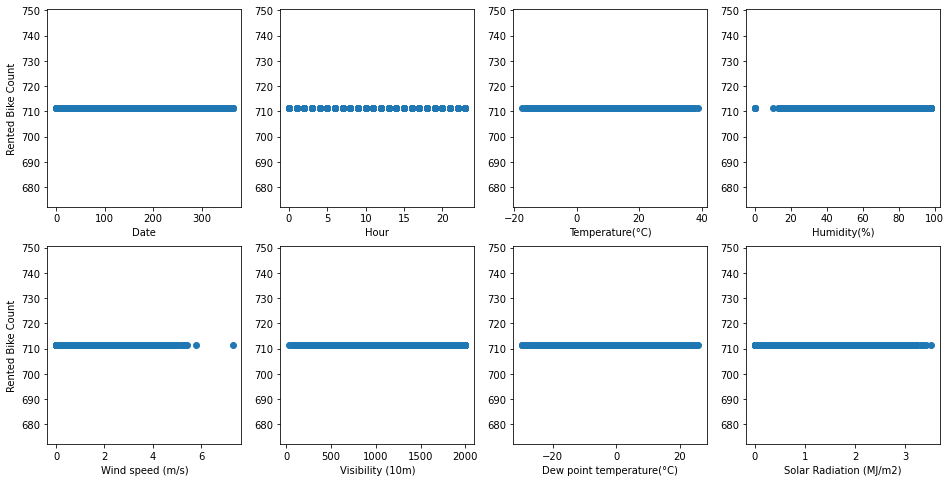

In [123]:
plt.figure(1, figsize=(16,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.scatter(Xte[:,[i]],Ypred)
    if i %4==0:
        plt.ylabel('Rented Bike Count')
    plt.xlabel(features[i])

K-Nearest Neighbour Regressor

In [111]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate KFold with 5 splits. 
# Set the parameter random_state to help you reproduce your results if needed.
cv = KFold(n_splits=5,random_state=10, shuffle=True)

# Set a variable max_k to 30 
max_k = 30

# Inititalise two variables to store the 
# training accuracies and validation accuracies 
# (these need to store max_k*5 accuracies) 
train_mse = [[] for _ in range(max_k)]
train_r2  = [[] for _ in range(max_k)]
val_mse = [[] for _ in range(max_k)]
val_r2 = [[] for _ in range(max_k)]

# Loop over the values of k: 
for k in range(max_k):
    
    # Instantiate a k-nn classifier (Use the sklearn classifier) with the current value of k 
    knn = KNeighborsRegressor(n_neighbors=k+1)
    # Loop over the cross-validation splits: 
    for train_index, val_index in cv.split(Xtr):
        Xtrain, Xval, Ytrain, Yval = Xtr[train_index],\
            Xtr[val_index], Ytr[train_index], Ytr[val_index]
        # fit the model on the current split of data 
        model=knn.fit(Xtrain, Ytrain)
        # make predictions 
        Ypredtrain=model.predict(Xtrain)
        Ypredval=model.predict(Xval)
        # calculate training and validation accuracy and store 
        train_mse[k].append(mean_squared_error(Ytrain,Ypredtrain))
        train_r2[k].append(r2_score(Ytrain,Ypredtrain))
        val_mse[k].append(mean_squared_error(Yval, Ypredval))
        val_r2[k].append(r2_score(Yval, Ypredval))

# Calculate the mean training and validation accuracies across splits for each k
mean_train_r2 = np.mean(train_r2, axis=1)
mean_train_mse = np.mean(train_mse, axis=1)
mean_val_mse = np.mean(val_mse, axis=1)
mean_val_r2 = np.mean(val_r2, axis=1)

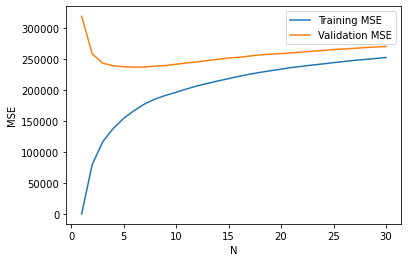

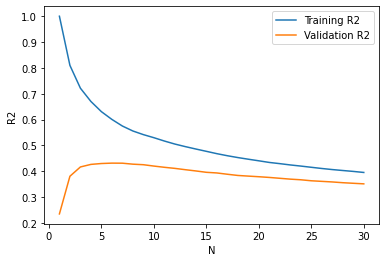

Optimal_N: 6
Performance on test dataset
KNN_MSE: 231055.14
KNN_R2: 0.43


In [112]:
# plot N vs MSE
x = range(1, max_k+1)
plt.figure(1)
plt.plot(x, mean_train_mse, label='Training MSE')
plt.plot(x, mean_val_mse, label='Validation MSE')
plt.legend()
plt.xlabel('N')
plt.ylabel('MSE')
plt.show()

plt.figure(2)
plt.plot(x, mean_train_r2, label='Training R2')
plt.plot(x, mean_val_r2, label='Validation R2')
plt.legend()
plt.xlabel('N')
plt.ylabel('R2')
plt.show()

# find optimal N for validation dataset
opt_n = np.argmin(mean_val_mse)+1
knn = KNeighborsRegressor(n_neighbors=opt_n)
print(f'Optimal_N: {opt_n}')

# find MSE of test dataset
knn.fit(Xtr, Ytr)
Ypred = knn.predict(Xte)
knn_mse = mean_squared_error(Yte, Ypred)
knn_r2 = r2_score(Yte, Ypred)
print(f'Performance on test dataset')
print(f'KNN_MSE: {knn_mse:.2f}')
print(f'KNN_R2: {knn_r2:.2f}')

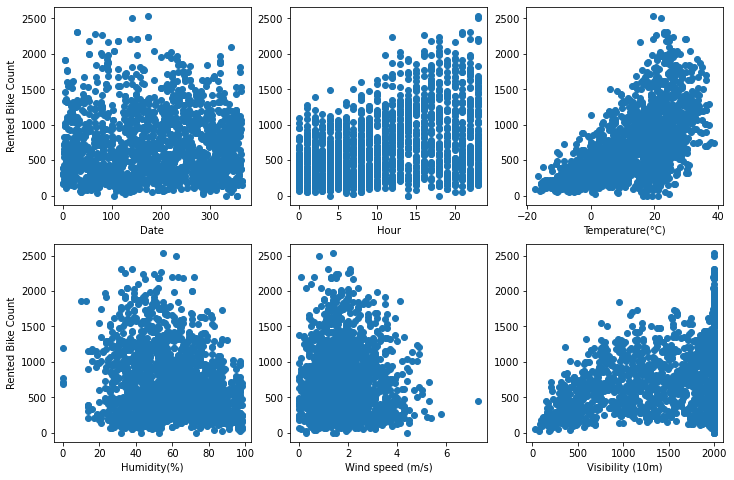

In [113]:
plt.figure(1, figsize=(16,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.scatter(Xte[:,[i]],Ypred)
    if i %4==0:
        plt.ylabel('Rented Bike Count')
    plt.xlabel(features[i])

Dicision Tree Regressor

In [114]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate KFold with 5 splits. 
# Set the parameter random_state to help you reproduce your results if needed.
cv = KFold(n_splits=5,random_state=10, shuffle=True)

# Set a variable max_k to 30 
max_d = 30

# Inititalise two variables to store the 
# training accuracies and validation accuracies 
# (these need to store max_k*5 accuracies) 
train_mse = [[] for _ in range(max_k)]
train_r2  = [[] for _ in range(max_k)]
val_mse = [[] for _ in range(max_k)]
val_r2 = [[] for _ in range(max_k)]

# Loop over the values of k: 
for d in range(max_d):
    
    # Instantiate a k-nn classifier (Use the sklearn classifier) with the current value of k 
    dtr = DecisionTreeRegressor(max_depth=d+1)
    # Loop over the cross-validation splits: 
    for train_index, val_index in cv.split(Xtr):
        Xtrain, Xval, Ytrain, Yval = Xtr[train_index],\
            Xtr[val_index], Ytr[train_index], Ytr[val_index]
        # fit the model on the current split of data 
        model=dtr.fit(Xtrain, Ytrain)
        # make predictions 
        Ypredtrain=model.predict(Xtrain)
        Ypredval=model.predict(Xval)
        # calculate training and validation accuracy and store 
        train_mse[d].append(mean_squared_error(Ytrain,Ypredtrain))
        train_r2[d].append(r2_score(Ytrain,Ypredtrain))
        val_mse[d].append(mean_squared_error(Yval, Ypredval))
        val_r2[d].append(r2_score(Yval, Ypredval))
        
# Calculate the mean training and validation accuracies across splits for each k
mean_train_r2 = np.mean(train_r2, axis=1)
mean_train_mse = np.mean(train_mse, axis=1)
mean_val_mse = np.mean(val_mse, axis=1)
mean_val_r2 = np.mean(val_r2, axis=1)

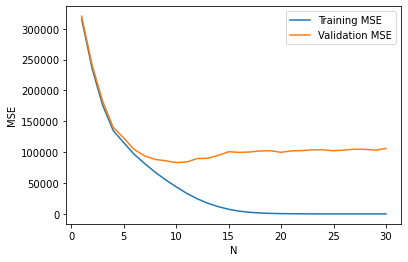

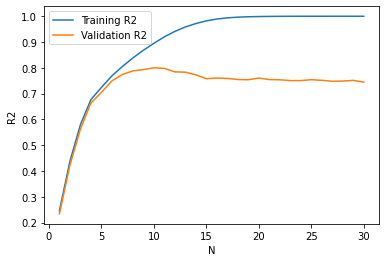

Optimal_Depth: 10
Performance on test dataset
DecisionTreeRegressor_MSE: 78141.36
DecisionTreeRegressor_R2: 0.81


In [115]:
# plot N vs MSE
plt.figure(1)
x = range(1, max_k+1)
plt.plot(x, mean_train_mse, label='Training MSE')
plt.plot(x, mean_val_mse, label='Validation MSE')
plt.legend()
plt.xlabel('N')
plt.ylabel('MSE')
plt.show()

plt.figure(2)
plt.plot(x, mean_train_r2, label='Training R2')
plt.plot(x, mean_val_r2, label='Validation R2')
plt.legend()
plt.xlabel('N')
plt.ylabel('R2')
plt.show()

# find optimal N for validation dataset
opt_d = np.argmin(mean_val_mse)+1
print(f'Optimal_Depth: {opt_d}')

# find MSE of test dataset
dtr = DecisionTreeRegressor(max_depth=opt_d)
dtr.fit(Xtr, Ytr)
Ypred = dtr.predict(Xte)
dtr_mse = mean_squared_error(Yte, Ypred)
dtr_r2 = r2_score(Yte, Ypred)
print(f'Performance on test dataset')
print(f'DecisionTreeRegressor_MSE: {dtr_mse:.2f}')
print(f'DecisionTreeRegressor_R2: {dtr_r2:.2f}')

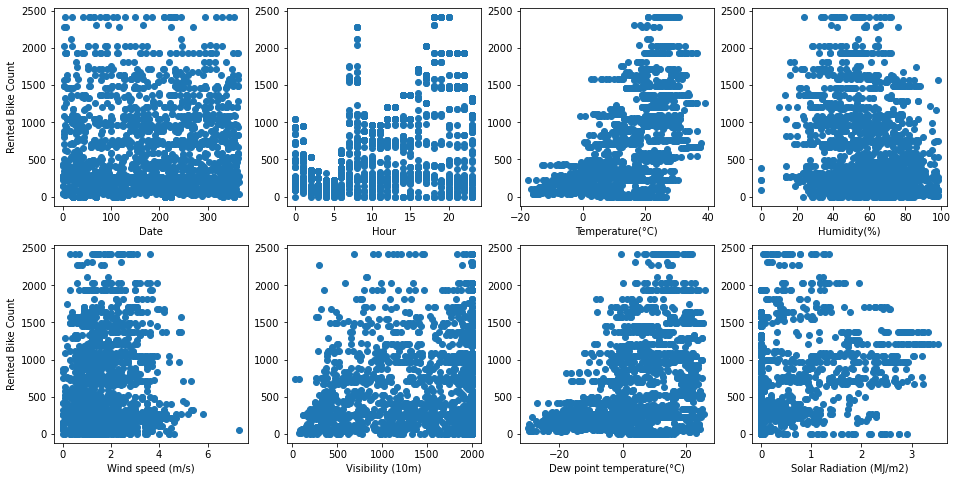

In [120]:
plt.figure(1, figsize=(16,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.scatter(Xte[:,[i]],Ypred)
    if i %4==0:
        plt.ylabel('Rented Bike Count')
    plt.xlabel(features[i])

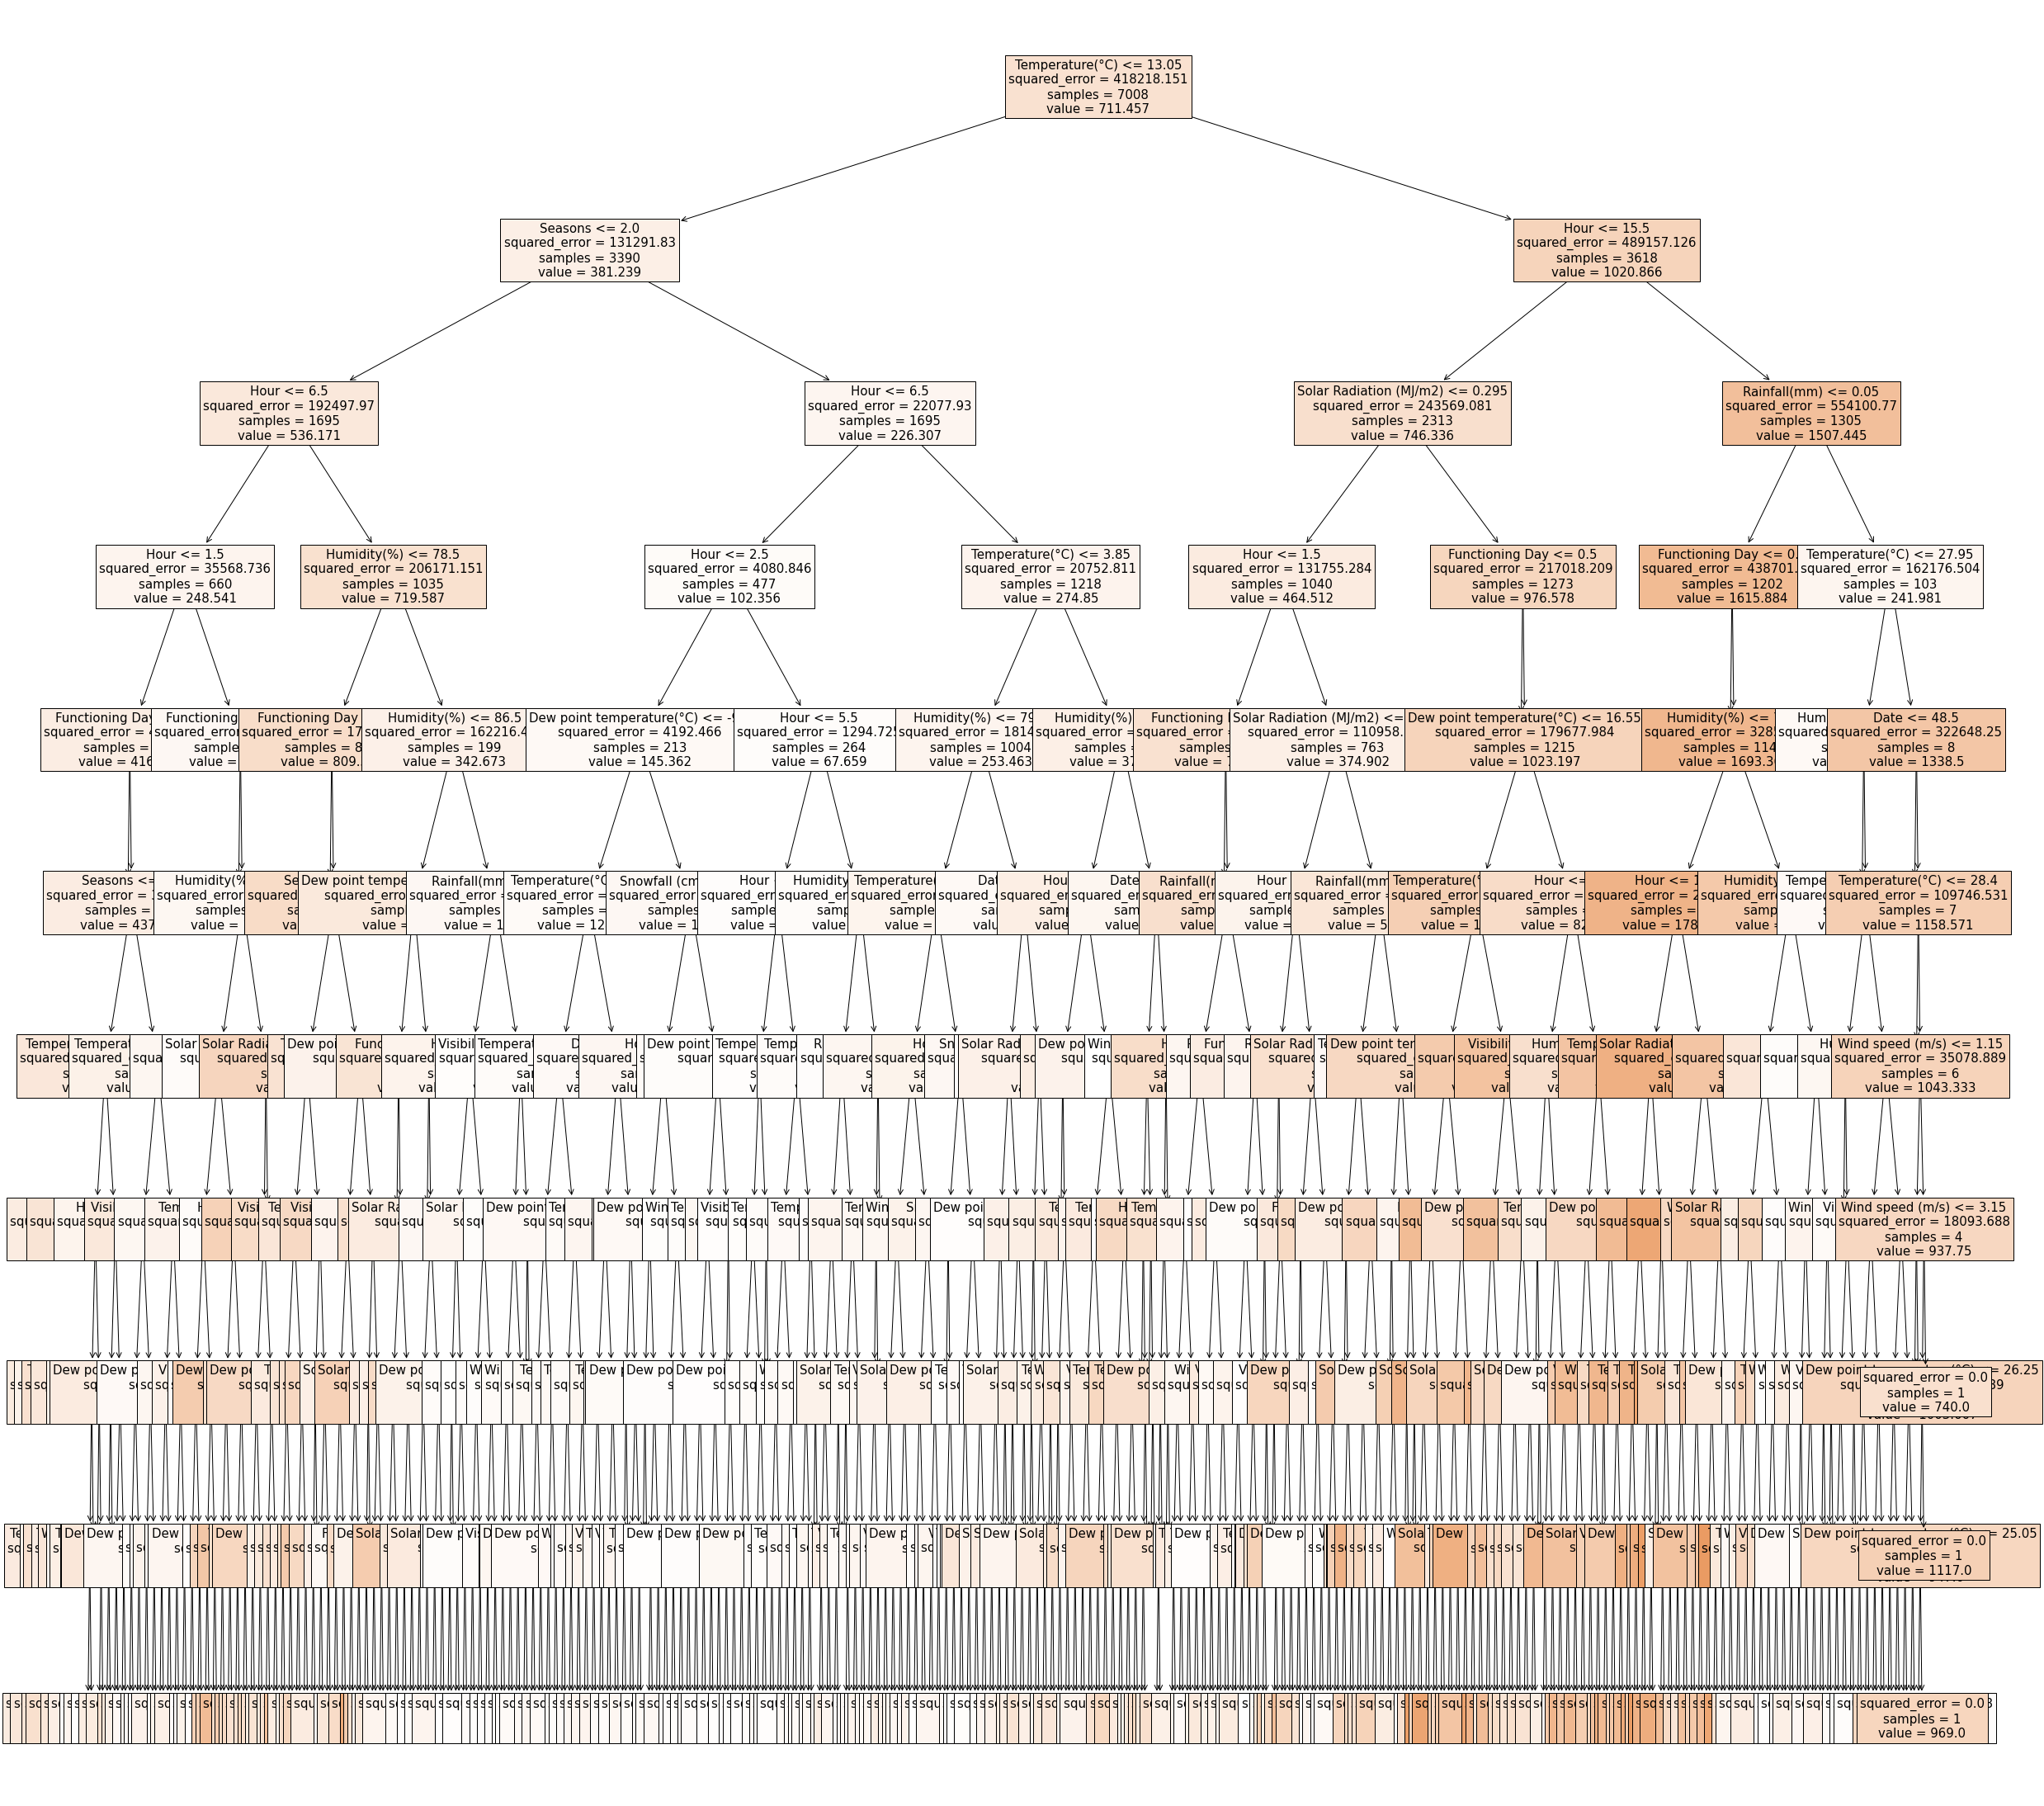

In [116]:
from sklearn.tree import plot_tree

plt.figure(1, figsize=[40,40])
features = list(raw_X.columns.values)
plot_tree(dtr,max_depth=opt_d,feature_names=features,filled=True,fontsize=15)
plt.show()

In [117]:
print(f'-------PERFORMANCE ON TEST DATASET-------')
print('=== Dummy Regressor:')
print(f'MSE: {dummy_mse:.2f}')
print(f'R2: {dummy_r2:.2f}')
print("")
print('=== KNN Regressor:')
print(f'Optimal N: {opt_n}')
print(f'MSE: {knn_mse:.2f}')
print(f'R2: {knn_r2:.2f}')
print("")
print('=== Decision Tree Regressor KNN:')
print(f'Optimal depth: {opt_d}')
print(f'MSE: {dtr_mse:.2f}')
print(f'R2: {dtr_r2:.2f}')

-------PERFORMANCE ON TEST DATASET-------
=== Dummy Regressor:
MSE: 407233.58
R2: -0.00

=== KNN Regressor:
Optimal N: 6
MSE: 231055.14
R2: 0.43

=== Decision Tree Regressor KNN:
Optimal depth: 10
MSE: 78141.36
R2: 0.81
